In [2]:
from tools import get_Tapes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# import tapes data
tapes = get_Tapes()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

Text(0.5, 1.0, 'Matched Price over time')

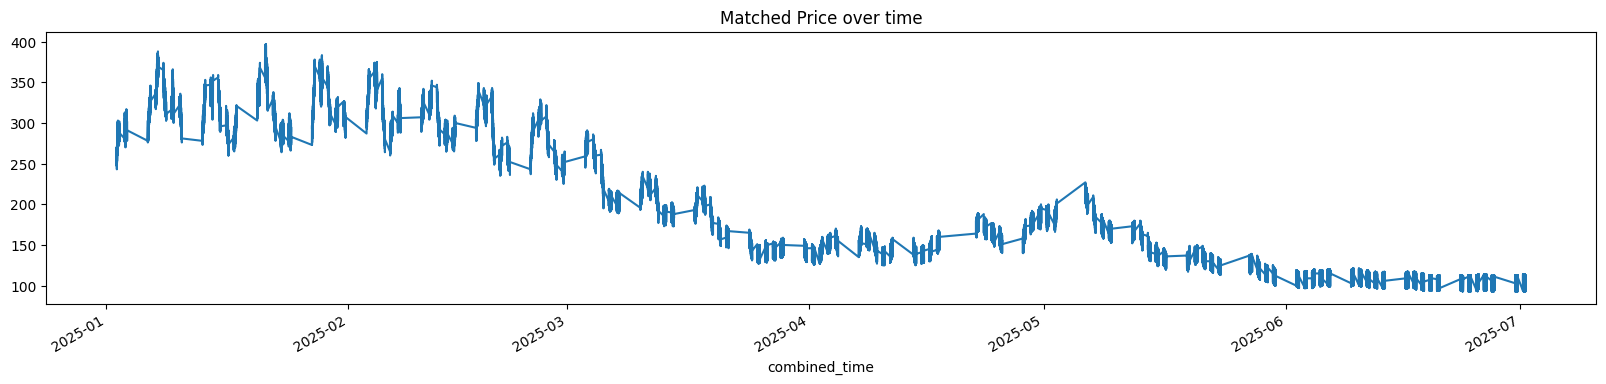

In [4]:
# view all tapes prices
merged_tapes = pd.concat(tapes, axis = 0)
plt.figure(figsize=(20,4))
merged_tapes['Price'].plot()
plt.title("Matched Price over time")

C:\Users\wwden\AppData\Local\Temp\ipykernel_31136\2202065962.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  merged_tapes.hist(bins=20, ax=ax)


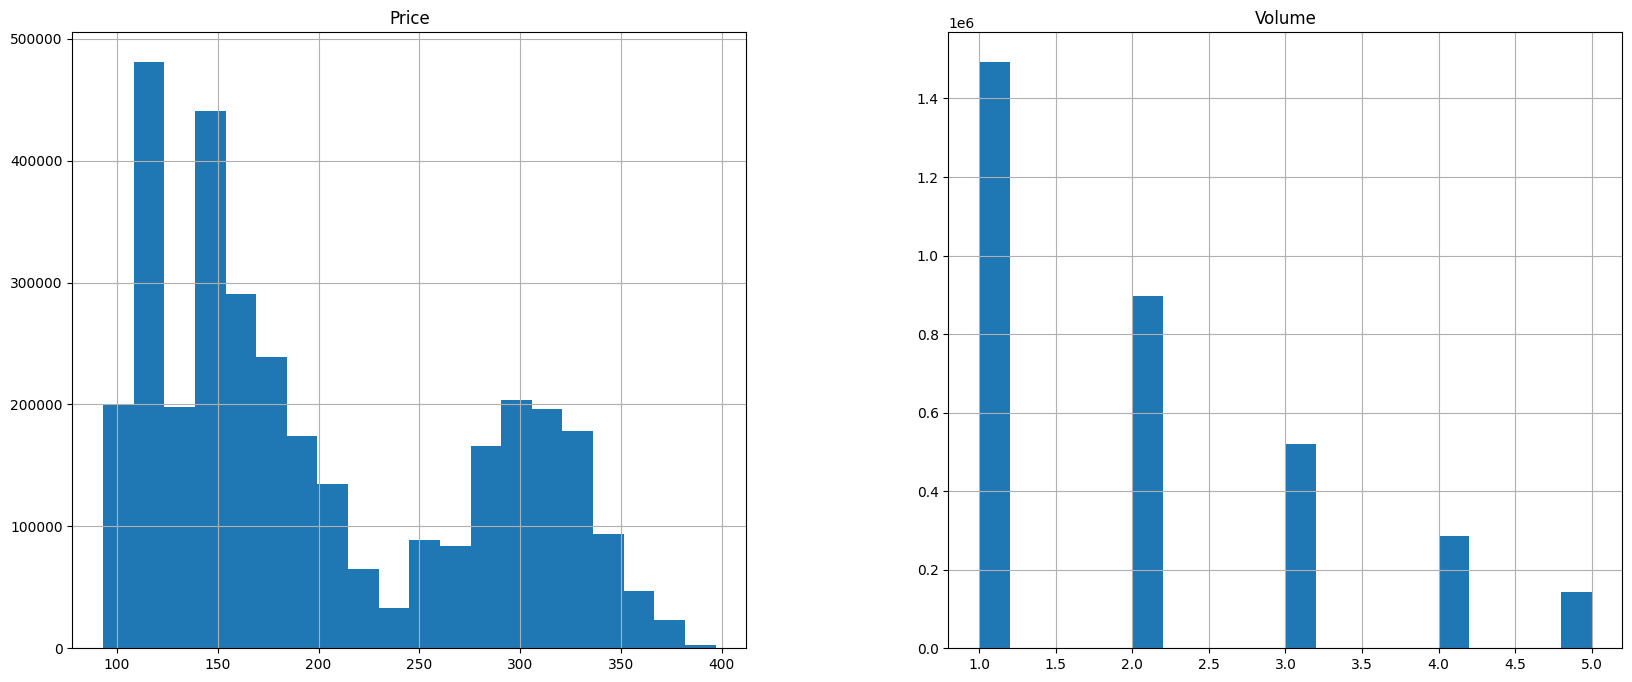

In [5]:
# look at distribution of price and volume
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the histogram on the axes
merged_tapes.hist(bins=20, ax=ax)
plt.show()

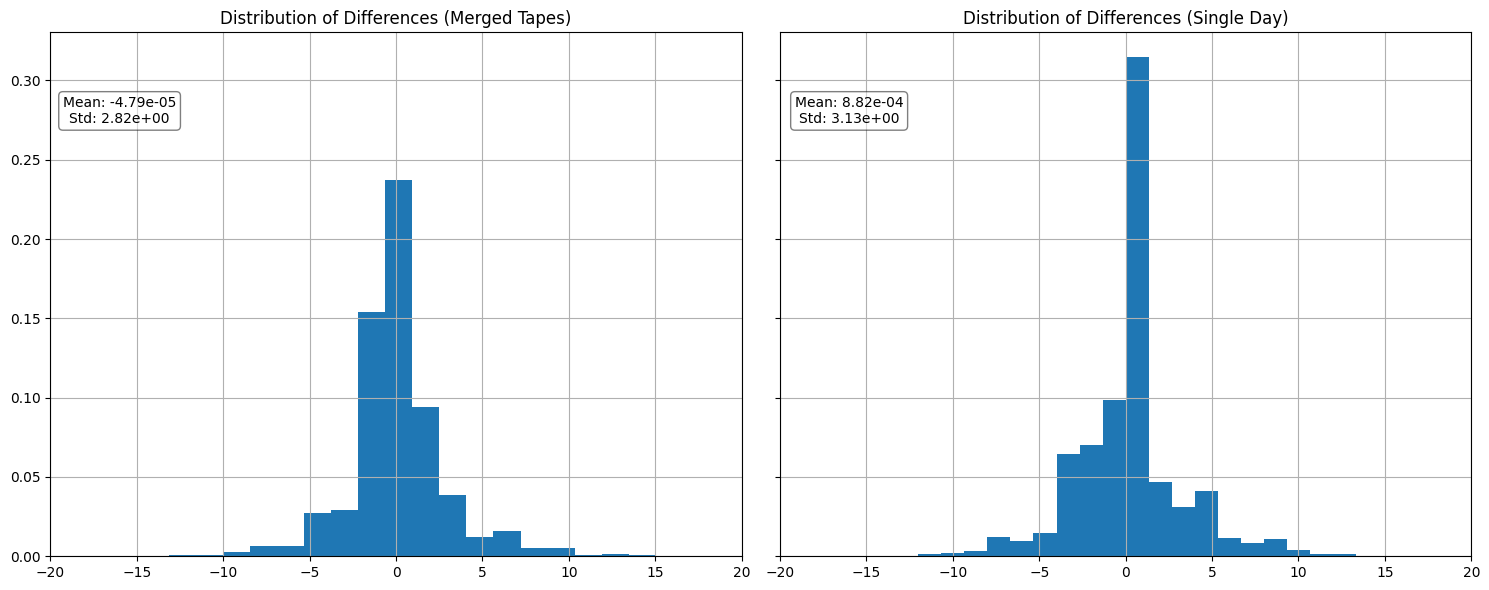

In [6]:
import matplotlib.pyplot as plt

# Assuming merged_tapes and tapes are your DataFrames or Series containing the data
# Check if merged_tapes and tapes actually contain data

# Define the number of bins
num_bins = 30
x_lim = 20

# Create a figure and axes objects with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # Set sharey=True to share y-axis

# Plot the histogram of differences in the first subplot
merged_tapes["diff"] = merged_tapes["Price"].diff(1)
mean_diff = merged_tapes["diff"].mean()
std_diff = merged_tapes["diff"].std()
merged_tapes["diff"].hist(bins=num_bins, density=True, ax=axs[0])
axs[0].set_title(f'Distribution of Differences (Merged Tapes)')
axs[0].set_xlim([-x_lim, x_lim])  # Set the same x-axis limits for both subplots
axs[0].annotate(f'Mean: {mean_diff:.2e}\nStd: {std_diff:.2e}', xy=(0.1, 0.85), xycoords='axes fraction',
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


# Plot the histogram of differences for a single day in the second subplot
day = 0  # Change this to select a different day
mean_diff_day = tapes[day]["Price"].diff(1).mean()
std_diff_day = tapes[day]["Price"].diff(1).std()
tapes[day]["Price"].diff(1).hist(bins=num_bins, density=True, ax=axs[1])
axs[1].set_title('Distribution of Differences (Single Day)')
axs[1].set_xlim([-x_lim, x_lim])  # Set the same x-axis limits for both subplots
axs[1].annotate(f'Mean: {mean_diff_day:.2e}\nStd: {std_diff_day:.2e}', xy=(0.1, 0.85), xycoords='axes fraction',
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
merged_tapes["Price"].describe()

count    3.340501e+06
mean     2.005110e+02
std      8.010002e+01
min      9.300000e+01
25%      1.360000e+02
50%      1.720000e+02
75%      2.840000e+02
max      3.970000e+02
Name: Price, dtype: float64

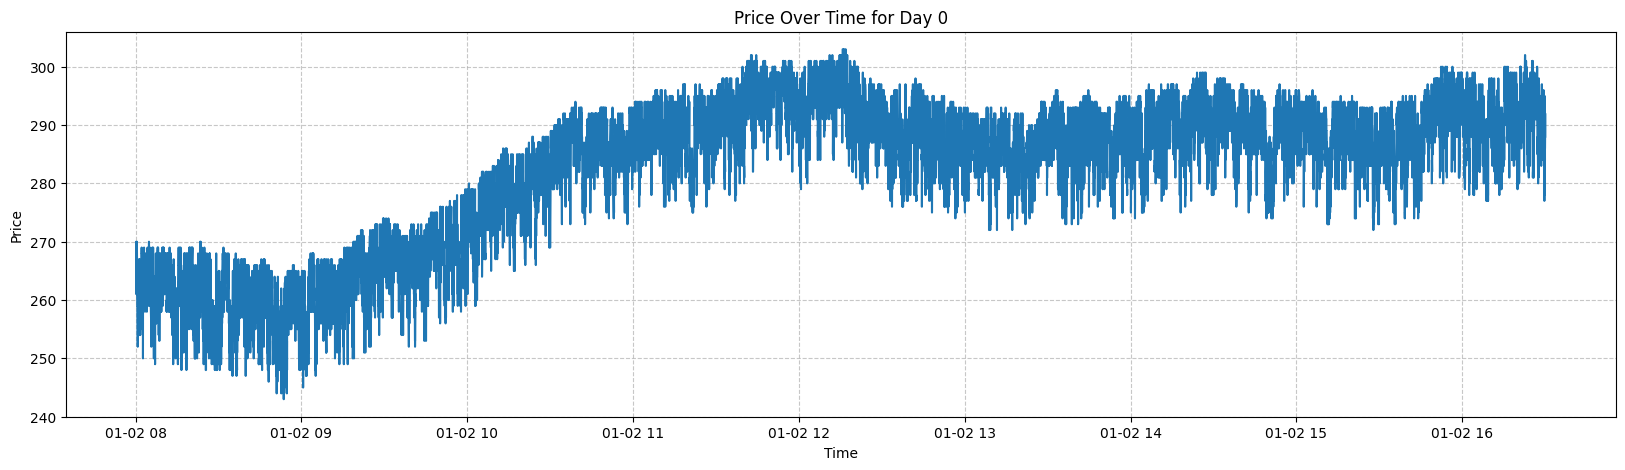

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(tapes[0].index, tapes[0]["Price"],label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Over Time for Day 0')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\wwden\AppData\Local\Temp\ipykernel_31136\3825336406.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  resampled_df["Price"] = resampled_df["Price"].fillna(method='ffill')


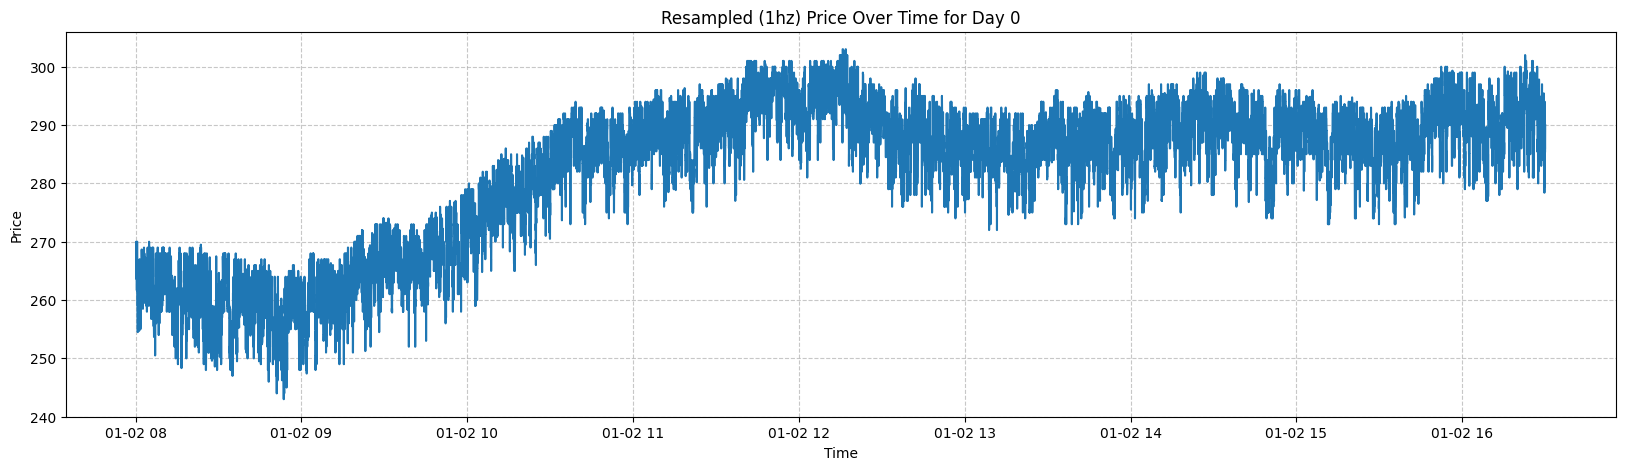

In [24]:
resampled_df = tapes[0]
resampled_df["Price*Volume"] = resampled_df["Price"] * resampled_df["Volume"]
resampled_df = resampled_df.resample("1s").sum()
resampled_df["Price"] = resampled_df["Price*Volume"] / resampled_df["Volume"]
resampled_df["Price"] = resampled_df["Price"].fillna(method='ffill')

plt.figure(figsize=(20,5))
plt.plot(resampled_df.index, resampled_df["Price"])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Resampled (1hz) Price Over Time for Day 0')
plt.grid(True, linestyle='--', alpha=0.7)